In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
data = pd.read_csv('Virtual-Intership/British-Airways/data/Cleaned.csv')

In [66]:
df = data.copy()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1830 non-null   int64  
 1   Date            1830 non-null   object 
 2   Authentication  961 non-null    object 
 3   Description     1830 non-null   object 
 4   Rating          1827 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 71.6+ KB


In [68]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [69]:
df.shape

(1830, 4)

In [70]:
df = df.drop_duplicates()

In [71]:
df = df.dropna()

In [72]:
df.shape

(961, 4)

In [73]:
df =df[df['Authentication'] != 'Not Verified']


In [74]:
df.Rating.describe()

count    959.000000
mean       0.433472
std        0.300757
min        0.100000
25%        0.100000
50%        0.400000
75%        0.700000
max        1.000000
Name: Rating, dtype: float64

In [86]:
df['Date'] = pd.to_datetime(df['Date'])

<Axes: xlabel='Rating', ylabel='Density'>

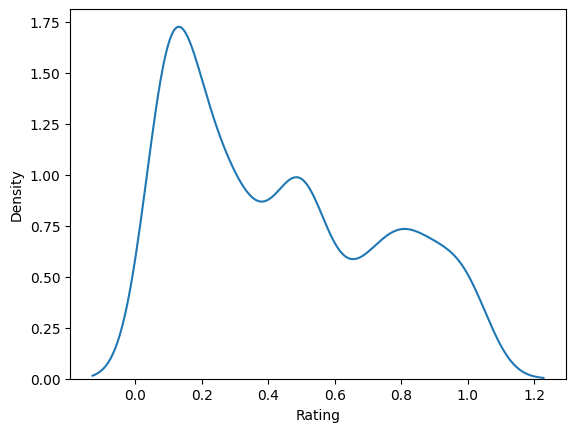

In [98]:
sns.kdeplot(df['Rating'])

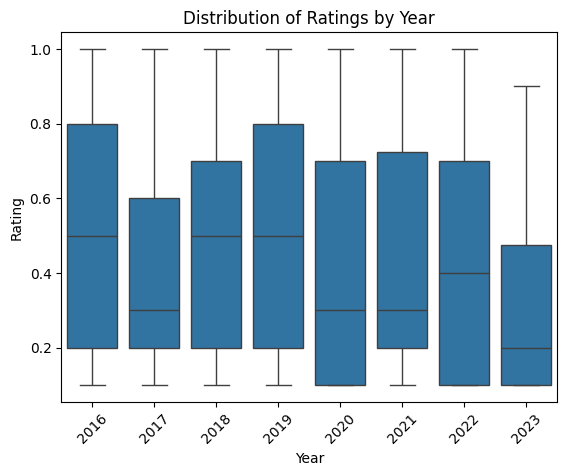

In [94]:

df['Year'] = df['Date'].dt.year
sns.boxplot(x='Year', y='Rating', data=df)
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Distribution of Ratings by Year')
plt.xticks(rotation=45)
plt.show()

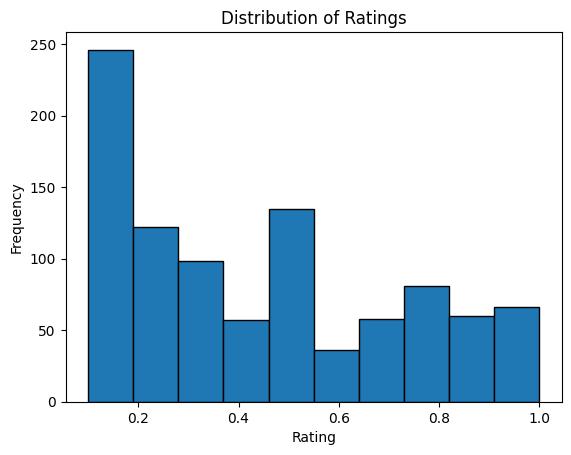

In [96]:
plt.hist(df['Rating'], bins=10, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

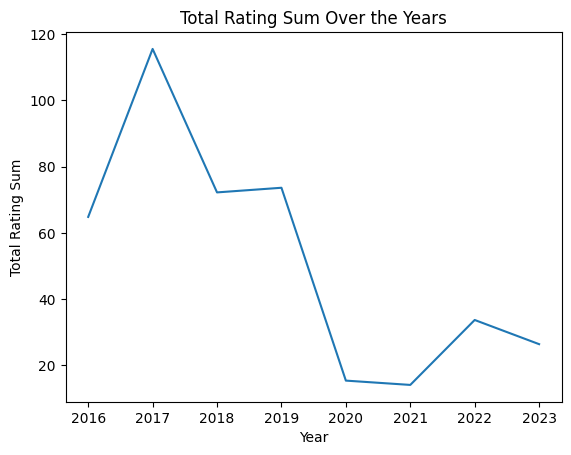

In [102]:



da = df.groupby(df['Date'].dt.year)['Rating'].sum().reset_index()
da.rename(columns={'Date': 'Year'}, inplace=True)
sns.lineplot(data=da, x='Year', y='Rating')
plt.xlabel('Year')
plt.ylabel('Total Rating Sum')
plt.title('Total Rating Sum Over the Years')
plt.show()

In [104]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

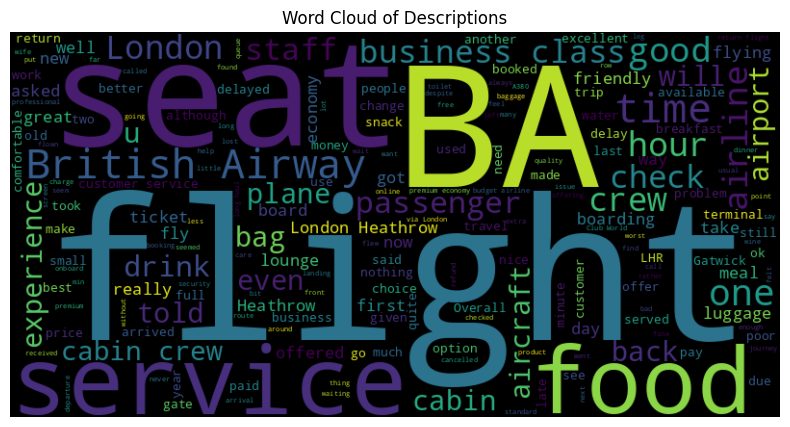

In [105]:
text = ' '.join(df['Description'])
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Descriptions')
plt.show()

In [107]:

data = text.strip()

In [109]:
from collections import Counter

In [110]:
word_list = data.split(' ')
word_counts = Counter(word_list)

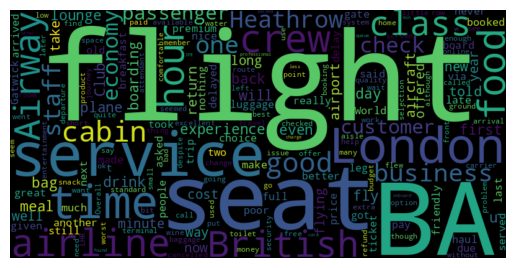

In [114]:
wordcloud = WordCloud(width=800, height=400,margin=0,collocations = False, background_color = 'black').generate(data)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [115]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /home/jo/nltk_data...


True

In [116]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Create a function to get sentiment scores for a given text
def get_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Apply the sentiment analysis function to the 'Description' column and create a new 'Sentiment' column
df['Sentiment'] = df['Description'].apply(get_sentiment_score)


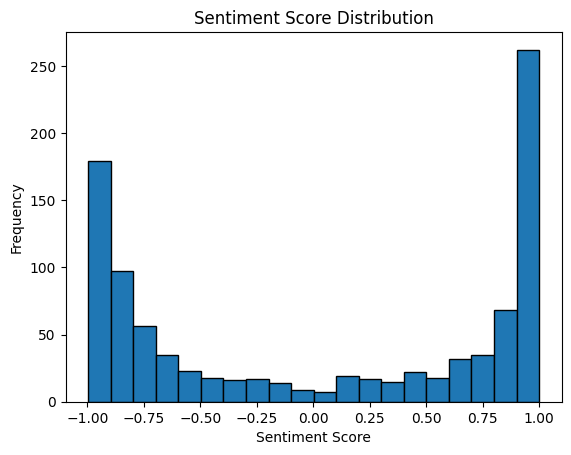

In [119]:


# Histogram of sentiment scores
plt.hist(df['Sentiment'], bins=20, edgecolor='k')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution')
plt.show()


In [120]:
from textblob import TextBlob


In [121]:
# Create a function to get sentiment polarity for a given text
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment analysis function to the 'Description' column and create a new 'Sentiment_Polarity' column
df['Sentiment_Polarity'] = df['Description'].apply(get_sentiment_polarity)


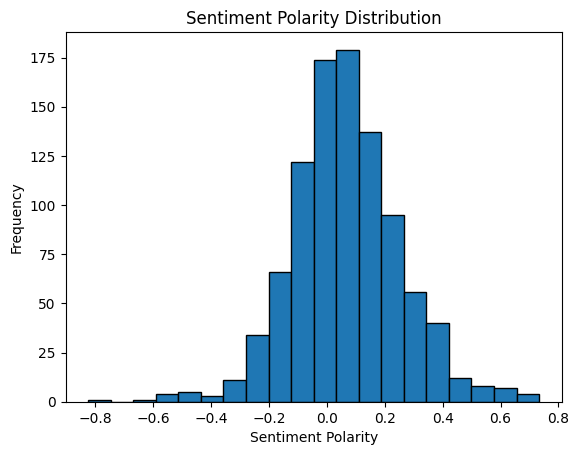

In [122]:
# Histogram of sentiment polarities
plt.hist(df['Sentiment_Polarity'], bins=20, edgecolor='k')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Polarity Distribution')
plt.show()

In [123]:
df.Description

2       BA standards continue to decline   BA standard...
4       Not a reliable airline   Not a reliable airlin...
5       It is a national disgrace   I take comfort in ...
6       The worst journey in my life   The worst journ...
7       Very disappointed  The airplanes and the loung...
                              ...                        
1152    same seat as economy class   London Gatwick to...
1153    absurd cost-cutting measure   Washington to Du...
1157    less comfortable than older style   Return fro...
1158    will fly again with BA   Flew British Airways ...
1159    better than most shorthaul   Gatwick to Sevill...
Name: Description, Length: 959, dtype: object

In [125]:
# Create an empty list to store sentiment polarities
polarity = []

# Iterate through each description in the 'Description' column
for description in df['Description']:
    try:
        # Calculate sentiment polarity using TextBlob and append it to the 'polarity' list
        polarity.append(TextBlob(description).sentiment.polarity)
    except:
        # Handle exceptions, if any (e.g., empty descriptions)
        polarity.append(0)

In [134]:
polarity

[0.008531746031746034,
 0.004924242424242437,
 -0.12727272727272726,
 -0.13828671328671327,
 -0.15000000000000002,
 -0.16111111111111107,
 0.22083333333333333,
 0.3538888888888888,
 -0.033333333333333326,
 -0.047499999999999994,
 0.06372222222222222,
 0.24145454545454548,
 0.07234848484848484,
 -0.09432539682539683,
 -0.13789473684210524,
 0.0,
 -0.02380952380952382,
 0.22934782608695653,
 0.21202380952380953,
 0.2568181818181818,
 0.03749999999999999,
 -0.107010582010582,
 0.04933144812177069,
 0.004029304029304024,
 0.0973958333333333,
 0.023684210526315787,
 0.5517906336088155,
 0.12760416666666669,
 -0.07222222222222223,
 -0.041666666666666664,
 -0.11197916666666669,
 0.09568452380952382,
 0.08333333333333333,
 0.28460784313725496,
 -0.5531250000000001,
 0.225,
 -0.03261904761904761,
 -0.18666666666666668,
 0.030000000000000006,
 0.595,
 -0.2157142857142857,
 -0.17500000000000004,
 -0.5499999999999999,
 -0.2159090909090909,
 -0.09259259259259259,
 -0.319047619047619,
 -0.328125,
 0

In [128]:
# Filter positive comments
positive_comments = df[df['Sentiment_Polarity'] == 1]['Description']

# Filter negative comments
negative_comments = df[df['Sentiment_Polarity'] == -1]['Description']


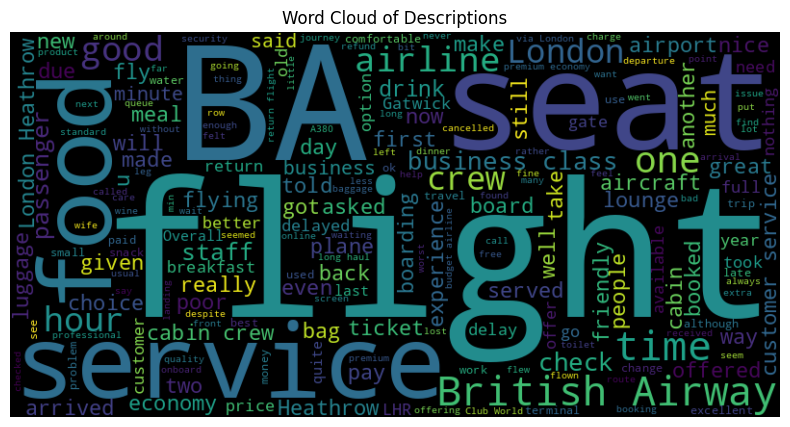

In [138]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'text' contains your text data
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))  # Adjust the dpi here for higher resolution
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Descriptions')
plt.show()


In [143]:
pole = pd.DataFrame(polarity)

In [146]:
pole.describe()

,0
count,959.000000
mean,0.066136
std,0.189037
min,-0.825000
25%,-0.048596
50%,0.053333
75%,0.175233
max,0.733333


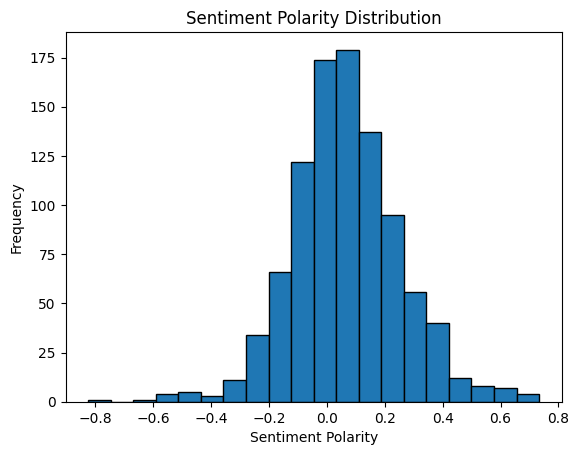

In [149]:
# Histogram of sentiment polarities
plt.hist(pole, bins=20, edgecolor='k')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Polarity Distribution')
plt.show()